In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy.sparse import hstack

#Classifiers
'''Classifiers'''
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

'''Metrics/Evaluation'''
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix

In [2]:
df_train = pd.read_csv('df_train.csv')

In [4]:
tfidf_vect = TfidfVectorizer(ngram_range=(1, 1), min_df=10)

X = tfidf_vect.fit_transform(df_train['tweets_clean'].astype('str')) # text features
y = df_train['label'].values # target

fe_cols = ['n', 'f', 's', 't', 'nr', 'ns', 'nt', 'nw', 'nz', 'v', 'vd', 'vn', 'a', 'ad', 'an', 'd', 'm', 'q', 'r', 'p', 'c', 'u', 'xc', 'w', 'PER', 'LOC', 'ORG', 'TIME', 'O', 'n_pos', 'n_neg']

X_fe = df_train[fe_cols].to_numpy()


X = hstack([X, X_fe])

print (X.shape)
print(y.shape)

(21073, 70853)
(21073,)


In [5]:

#Preliminary model evaluation using default parameters

#Creating a dict of the models
model_dict = {'Logistic Regression': LogisticRegression(solver='liblinear', random_state=3),
              'Stochastic Gradient Descent' : SGDClassifier(random_state=3, loss='log'),
              'Random Forest': RandomForestClassifier(random_state=3),
              'Decsision Tree': DecisionTreeClassifier(random_state=3),
              'AdaBoost': AdaBoostClassifier(random_state=3),
              'XGBoost': XGBClassifier(random_state = 3),
              'K Nearest Neighbor': KNeighborsClassifier()}

#Train test split with stratified sampling for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = .2, 
                                                    shuffle = True, 
                                                    stratify = y, 
                                                    random_state = 3)

print (X_train.shape)
print(y_train.shape)

#Function to get the scores for each model in a df
def model_score_df(model_dict):   
    model_name, ac_score_list, p_score_list, r_score_list, f1_score_list = [], [], [], [], []
    for k,v in model_dict.items():   
        model_name.append(k)
        v.fit(X_train, y_train)
        y_pred = v.predict(X_test)
        ac_score_list.append(accuracy_score(y_test, y_pred))
        p_score_list.append(precision_score(y_test, y_pred, average='macro'))
        r_score_list.append(recall_score(y_test, y_pred, average='macro'))
        f1_score_list.append(f1_score(y_test, y_pred, average='macro'))
        model_comparison_df = pd.DataFrame([model_name, ac_score_list, p_score_list, r_score_list, f1_score_list]).T
        model_comparison_df.columns = ['model_name', 'accuracy_score', 'precision_score', 'recall_score', 'f1_score']
        model_comparison_df = model_comparison_df.sort_values(by='recall_score', ascending=False)
    return model_comparison_df

model_score_df(model_dict)

(16858, 70853)
(16858,)


/Users/lichendong/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:05:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,model_name,accuracy_score,precision_score,recall_score,f1_score
5,XGBoost,0.965836,0.966384,0.965554,0.965798
4,AdaBoost,0.954448,0.954854,0.9542,0.954403
0,Logistic Regression,0.952076,0.953885,0.951501,0.951967
1,Stochastic Gradient Descent,0.949941,0.951821,0.949351,0.949823
2,Random Forest,0.947331,0.94856,0.94686,0.947236
3,Decsision Tree,0.93452,0.934527,0.934455,0.934488
6,K Nearest Neighbor,0.892527,0.892544,0.892411,0.892466


In [12]:
XGBClassifier(random_state = 3)

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=3, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [13]:
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.5, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=75, n_jobs=8,
              num_parallel_tree=1, random_state=3, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

## XGBoost Parameters Tuning

In [6]:
#Hyperparameter tuning
#Gridsearch with 5-fold cross validation
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV

#Xgboost
n_estimators = [50,75,100]
max_depth = [3,6,9]
learning_rate = [0.001,0.01,0.5]


random_state = [3]

clf = XGBClassifier(objective='binary:logistic',eval_metric='error')

params = dict(n_estimators=n_estimators,
              max_depth = max_depth,
              learning_rate = learning_rate,
              random_state=random_state)

gridsearch = GridSearchCV(clf,
                          params,
                          cv = 5,
                          verbose = 1,scoring = 'recall')

xgb_best_model = gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [7]:
model = xgb_best_model.best_estimator_
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.5, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=75, n_jobs=8,
              num_parallel_tree=1, random_state=3, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)


0.964650059311981


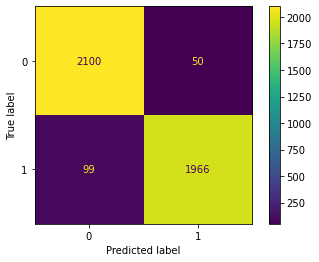

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))
plot_confusion_matrix(model, X_test, y_test)
plt.show() 

In [11]:
recall_score(y_test, y_pred, average='macro')

0.9644011487133284

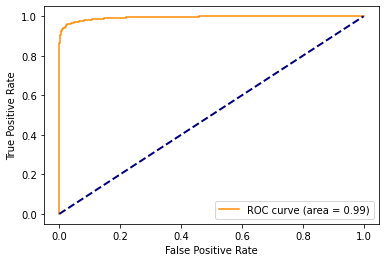

In [9]:
from sklearn.metrics import roc_curve, auc
lw = 2
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)'%auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [14]:
#Hyperparameter tuning
#Gridsearch with 5-fold cross validation
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV

#Xgboost
n_estimators = [50,75,100]
max_depth = [3,6,9]
learning_rate = [0.01,0.1,0.5]


random_state = [3]

clf = XGBClassifier(objective='binary:logistic',eval_metric='error')

params = dict(n_estimators=n_estimators,
              max_depth = max_depth,
              learning_rate = learning_rate,
              random_state=random_state)

gridsearch = GridSearchCV(clf,
                          params,
                          cv = 5,
                          verbose = 1,scoring = 'recall')

xgb_best_model_2 = gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [16]:
model_2 = xgb_best_model_2.best_estimator_
print(model_2)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.5, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=75, n_jobs=8,
              num_parallel_tree=1, random_state=3, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)


0.964650059311981


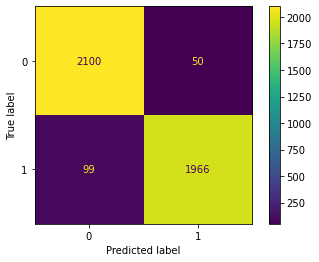

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
y_pred = model_2.predict(X_test)
print(accuracy_score(y_test,y_pred))
plot_confusion_matrix(model_2, X_test, y_test)
plt.show() 

### Shap Value

In [18]:
column_names_from_text_features = tfidf_vect.vocabulary_
rev_dictionary = {v:k for k,v in tfidf_vect.vocabulary_.items()}
column_names_from_text_features = [v for k,v in rev_dictionary.items()]
all_cols = column_names_from_text_features + fe_cols

In [37]:
import time
import shap 
t0 = time.time()
explainer = shap.TreeExplainer(model)
shap_values_train = explainer.shap_values(X_test)
t1 = time.time()
timeit=t1-t0
print('time to compute Shapley values (s):', timeit)

time to compute Shapley values (s): 3.3691370487213135


In [38]:
txt_dense_df = pd.DataFrame(X_test.todense(), 
                            columns=all_cols)
shap_values_train_df = pd.DataFrame(shap_values_train, 
                                    columns=txt_dense_df.columns)

In [39]:
import numpy as np
shap_sum = np.abs(shap_values_train_df).mean(axis=0)
importance_df = pd.DataFrame([txt_dense_df.columns.tolist(), 
                              shap_sum.tolist()]).T
importance_df.columns = ['column_name', 
                         'shap_importance (log-odds)']
importance_df = importance_df.sort_values('shap_importance (log-odds)', ascending=False)
importance_df['shap_importance (%)'] = importance_df['shap_importance (log-odds)'].apply(lambda x: 100*x/np.sum(importance_df['shap_importance (log-odds)']))

In [40]:

topN = 20
top20 = importance_df.iloc[0:topN]["column_name"]
print('Cumulative Importance', 
      np.sum(importance_df.iloc[0:topN]["shap_importance (%)"]))
shap_values_imp = shap_values_train_df[top20]
# shap.summary_plot(shap_values_train_df, 
#                   txt_dense_df, plot_type="bar")
importance_df.iloc[0:topN]

Cumulative Importance 45.07485657484335


,column_name,shap_importance (log-odds),shap_importance (%)
32362,共青团员,2.7541,13.157589
32353,划破,1.6032,7.659214
70851,n_pos,0.774938,3.702235
15938,住址,0.55342,2.643941
48433,清稗类钞,0.432804,2.067705
56632,震眼,0.36838,1.759919
30673,夜生活,0.322447,1.540478
67625,太皮,0.249686,1.192867
70840,r,0.248897,1.189096
43246,九折,0.241854,1.155447


In [42]:
from matplotlib.font_manager import _rebuild
_rebuild()

<BarContainer object of 20 artists>

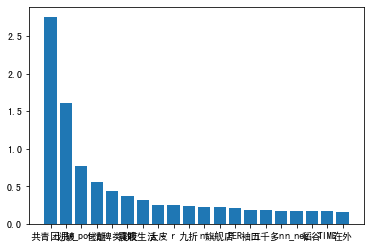

In [41]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.bar(importance_df.iloc[0:topN,0],importance_df.iloc[0:topN,1])


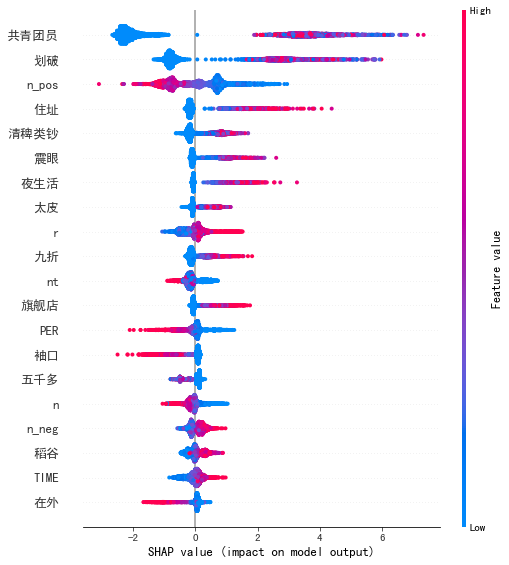

In [43]:
shap.summary_plot(shap_values_train, txt_dense_df)

### Local Shap Value

Depressed User

In [71]:
shap.initjs()
# visualize the j-prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values_imp.iloc[68].to_numpy(), 
                txt_dense_df.iloc[68][top20])

In [72]:
model.predict_proba(X_test)[68,1]

0.9945456

In [73]:
print(txt_dense_df.iloc[68],'\n y:',y_test[68])

多多       0.000000
注意       0.000000
防护       0.000000
预防       0.000000
感染       0.000000
           ...   
ORG      0.001858
TIME     0.012477
O        0.000000
n_pos    0.078843
n_neg    0.400584
Name: 68, Length: 70853, dtype: float64 
 y: 1


Normal User

In [85]:
shap.initjs()
# visualize the j-prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values_imp.iloc[78].to_numpy(), 
                txt_dense_df.iloc[78][top20])

In [84]:
print(txt_dense_df.iloc[78],'\n y:',y_test[78])

多多       0.000000
注意       0.000000
防护       0.000000
预防       0.000000
感染       0.000000
           ...   
ORG      0.002397
TIME     0.004194
O        0.000000
n_pos    0.205512
n_neg    0.236669
Name: 78, Length: 70853, dtype: float64 
 y: 0
